# Getting started

Before we get started, ensure you have the required packages installed:

```sh
pip install reductionml scikit-learn matplotlib
```

In [1]:
from reductionml import Workspace, FormatType

First, we need to define the configuration we are going to use. You can think of this as the definition of the structure of the reduction stack, including all things that will affect learning and prediction. Things such as hyper parameters.

We will create an instance of [`Coin`](https://jackgerrits.com/reductionml/book/coin.html) as the only reduction in our stack which provides solves for linear regression problems.

In [2]:
config = {
    "entryReduction": {
        "config": {},
        "typename": "Coin"
    }, 
    "globalConfig": {}
}

workspace = Workspace.create_from_config(config)

We're going to use the diabetes dataset from sklearn and plot the mean squared error after each example. We're using the [JSON](https://jackgerrits.github.io/reductionml/book/input_formats.html#json-format) format to provide the features to ReductionML.

We use `predict_then_learn` to predict the output of the model before learning and keep track of the progressive loss.s

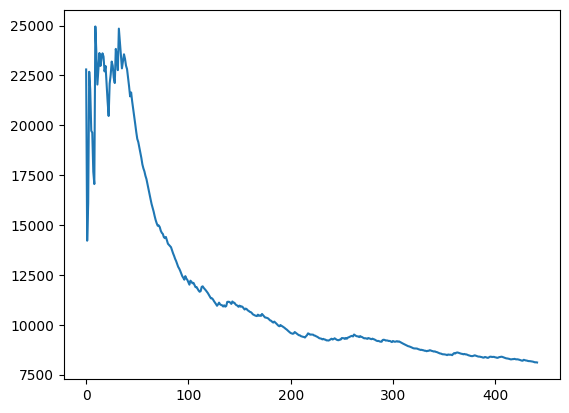

In [3]:
import sklearn.datasets
import matplotlib.pyplot as plt


def format_input(features, label):
    return {
        "label": {
            "value": label,
            "weight": 1.0
        },
        "features": {
            ":default": features.tolist()
        }
    }

dataset = sklearn.datasets.load_diabetes()

parser = workspace.create_parser(FormatType.Json)

mse_error = 0
count = 0
mse_errors = []
for (input_features, input_label) in zip(dataset.data, dataset.target):
    features, label = parser.parse(format_input(input_features, input_label))
    prediction = workspace.predict_then_learn(features, label)
    mse_error += (label.value - prediction.prediction) ** 2
    count += 1
    mse_errors.append(mse_error / count)

plt.plot(mse_errors)